<h1>Linear Piece Wise Image Transformation</h1>

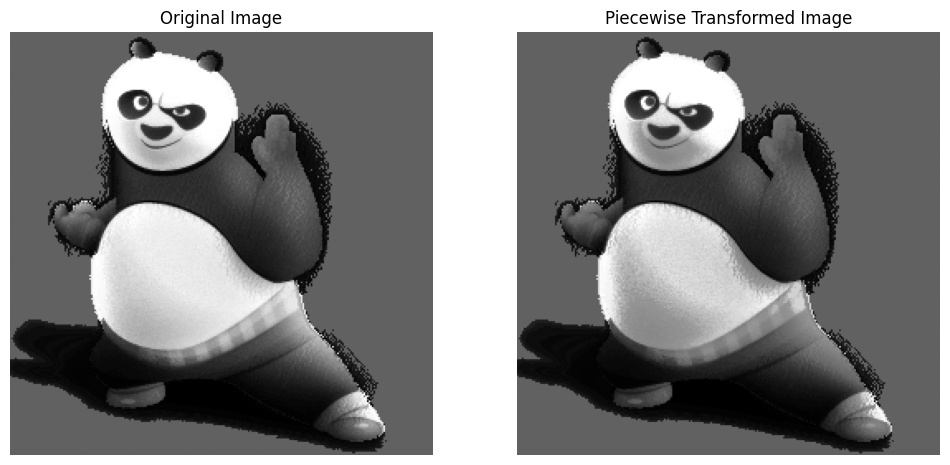

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

def generalize_linear_transform(image, control_points):
    img_out = np.zeros_like(image, dtype=np.float32)
    L = 256
    
    cp = sorted(control_points)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r = image[i, j]
            s = 0

            # Find the correct segment
            for k in range(len(cp) - 1):
                r_a, s_a = cp[k]
                r_b, s_b = cp[k+1]

                if r_a <= r <= r_b:
                    if r_a == r_b:
                        s = s_a
                    else:
                        m = (s_b - s_a) / (r_b - r_a)
                        b = s_a - m * r_a
                        s = m * r + b
                    break
                
                elif k == len(cp) - 2 and r > r_b:
                    s = s_b
                    break
                
                elif k == 0 and r < r_a:
                    s = s_a
                    break
            
            # Handle case where image intensity is outside the defined range
            if s == 0 and r != 0:
                 # Default to the closest control point output (clipping)
                if r < cp[0][0]:
                    s = cp[0][1]
                elif r > cp[-1][0]:
                    s = cp[-1][1]

            img_out[i, j] = s

    return np.clip(img_out, 0, L - 1).astype(np.uint8)

def process_and_display(image_path, control_points):
    try:
        img_data = mpimg.imread(image_path)
        if img_data.ndim == 3:
            image = np.dot(img_data[...,:3], [0.2989, 0.5870, 0.1140])
            image = (image * 255).astype(np.uint8)
        else:
            image = img_data
    except FileNotFoundError:
        print(f"Error: Image file not found at path: {image_path}")
        return
    except Exception as e:
        print(f"An error occurred while loading or processing the image: {e}")
        return

    transformed_image = generalize_linear_transform(image, control_points)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(transformed_image, cmap='gray')
    plt.title('Piecewise Transformed Image')
    plt.axis('off')

    plt.show()

# --- INPUT SECTION: Modify these variables ---

# 1. Define your image file path here
my_image_path = 'panda.png'

# 2. Define the control points for the transformation: [(r_in, s_out), ...]
# The intensity values should be between 0 and 255.
# Example 1: Contrast Stretching (Darker intensities compressed, mid-range stretched)
# control_points_stretch = [(0, 0), (50, 10), (150, 240), (255, 255)]

# Example 2: Simple Thresholding (everything above 128 becomes white, below becomes black)
# control_points_threshold = [(0, 0), (128, 0), (129, 255), (255, 255)]

# Example 3: Simple Clipping (everything between 100-200 is compressed into 100-150)
control_points = [(0, 0), (100, 100), (200, 150), (255, 255)]

# --- EXECUTE ---
process_and_display(my_image_path, control_points)